In [1]:
!pip install tokenizer

In [144]:
#Insert progress bar when running long processes - nice!
from tqdm import tqdm 

#Getting data from Google Storage
import gcsfs

#Handling csv files
import csv

#Handling pickle files
import pickle

#Getting json into Pandas DF
import json
from pandas.io.json import json_normalize
import urllib.request, json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Pre-processing
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
import tokenizer
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
import en_core_web_sm
from itertools import chain

from nltk.corpus import stopwords
import nltk;  nltk.download('stopwords')
stop_words = stopwords.words('english')

from nltk.stem.snowball import SnowballStemmer

#from sklearn.preprocessing import MultiLabelBinarizer

#Feature Extraction/Engineering
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Model Building
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn
from skmultilearn.adapt import MLkNN

#Model Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss

#Viz
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>




---




## INSTEAD OF STORING BUNCH OF HUGE FILES IN RAM, PROCESS ONE BY ONE SO BROWSER DOES NOT REFRESH

In [3]:
#if going url route, grab v8 .json using below call
#methods work; HTML path here is broken

# jsonurl = urllib.request.urlopen("https://storage.cloud.google.com/coronawhy/NLPDatasets/v7_preprocessed/v7_text.json")
# text = json.loads(jsonurl.read()) 

# text

In [4]:
#Another route: .json into pandas DF from Google Storage - This took a LONG time
# NLPData = pd.read_json('gs://coronawhy/NLPDatasets/v6_preprocessed/v6_text.json')
# NLPData 

In [5]:
#Put all files in a list to iterate through when reading .pkl as Pandas DF
pubs = ["v6_text_0.pkl", "v6_text_1.pkl", "v6_text_2.pkl", "v6_text_3.pkl", "v6_text_4.pkl", "v6_text_5.pkl", "v6_text_6.pkl", "v6_text_7.pkl", "v6_text_8.pkl", "v6_text_9.pkl", "v6_text_10.pkl", "v6_text_11.pkl", "v6_text_12.pkl", "v6_text_13.pkl", "v6_text_14.pkl", "v6_text_15.pkl", "v6_text_16.pkl", "v6_text_17.pkl", "v6_text_18.pkl", "v6_text_19.pkl"]

In [6]:
len(pubs)

20

In [7]:
#From each pub that is read in create a pandas data frame for each one
#Took around 10-15 min

def total_pubs(pubs):
   
  i = 0  
  while i < len(pubs):
    yield pd.read_pickle(pubs[i], 'gzip')    
    i += 1 
        
all_pubs = [i for i in total_pubs(pubs)] 

In [8]:
len(all_pubs) #Check that it is the length of original no. of files

20

In [9]:
#Combine all DF's

all_DFs = []
for i in range(0,20):
    all_DFs.append(all_pubs[i])

comb_DFs = pd.concat(all_DFs, ignore_index=True)
comb_DFs

,paper_id,language,section,sentence,lemma,UMLS,GGP,SO,TAXON,CHEBI,...,SIMPLE_CHEMICAL,ANATOMICAL_SYSTEM,IMMATERIAL_ANATOMICAL_ENTITY,MULTI-TISSUE_STRUCTURE,DEVELOPING_ANATOMICAL_STRUCTURE,ORGANISM_SUBDIVISION,CELLULAR_COMPONENT,PATHOLOGICAL_FORMATION,ORGANISM_SUBSTANCE,sentence_id
0,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"In Africa, there are no reports of H. influenz...","[in, Africa, ,, there, be, no, report, of, h.,...","[Africa, Haemophilus influenzae, Stickler synd...",[],[],[],[],...,[β-lactamase],[],[],[],[],[],[],[],[],94fc00bfd9a
1,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"In Oceania, In Oceania, H. influenzae isolates...","[in, Oceania, ,, in, Oceania, ,, h., influenza...","[Oceania <genus>, Oceania <genus>, Haemophilus...",[],[],[],[],...,[β-lactamase],[],[],[],[],[],[],[],[],94fc01bfd9a
2,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"Similarly, in New Zealand, 95% of OM-related H...","[similarly, ,, in, New, Zealand, ,, 95, %, of,...","[New Zealand, Haemophilus influenzae, Muscle s...",[],[],[],[],...,[],[],[],[],[],[],[],[],[],94fc02bfd9a
3,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"[86, 87] or was recommended for high risk grou...","[[, 86, ,, 87, ], or, be, recommend, for, high...","[high-risk group, Mexico, DUOXA1 gene]",[NIP],[],[],[],...,[],[],[],[],[],[],[],[],[],94fc03bfd9a
4,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,en,regional variation of h. influenzae strains an...,"Furthermore, the introduction of PCV7 into NIP...","[furthermore, ,, the, introduction, of, pcv7, ...","[Introduction procedure, DUOXA1 gene, high-ris...",[NIP],"[region, region]",[],[],...,[OM],[],[],[],[],[],[],[],[],94fc04bfd9a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488464,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,en,influenza,Surveillance is largely passive in relying on ...,"[surveillance, be, largely, passive, in, rely,...","[Medical Surveillance, Passive, Reporting, Inf...",[],[wild and],[human],[],...,[],[],[],[],[],[],[],[],[],8d1ca705853d08e
7488465,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,en,influenza,The major concern is to detect human-to-human ...,"[the, major, concern, be, to, detect, human-to...","[Detected (finding), disease transmission, Dis...",[],[],[human-to-human],[],...,[],[],[],[],[],[],[],[],[],8d1ca705863d08e
7488466,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,en,influenza,International efforts to improve national and ...,"[international, effort, to, improve, national,...","[International, Improved, Federal Government, ...",[],[],[animal-to-human],[],...,[],[],[],[],[],[],[],[],[],8d1ca705873d08e
7488467,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,en,influenza,An integral part of the pandemic planning resp...,"[an, integral, part, of, the, pandemic, planni...","[Pandemics, United Kingdom, potential, Homo sa...",[],[],[human],[],...,[],[],[],[],[],[],[],[],[],8d1ca705883d08e


In [10]:
#Get relevant columns
NLPData = comb_DFs[['paper_id','sentence']]
NLPData

,paper_id,sentence
0,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"In Africa, there are no reports of H. influenz..."
1,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"In Oceania, In Oceania, H. influenzae isolates..."
2,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"Similarly, in New Zealand, 95% of OM-related H..."
3,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"[86, 87] or was recommended for high risk grou..."
4,94fc08607ba07e9f5a0239d27251d4cdcc6bfd9a,"Furthermore, the introduction of PCV7 into NIP..."
...,...,...
7488464,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,Surveillance is largely passive in relying on ...
7488465,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,The major concern is to detect human-to-human ...
7488466,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,International efforts to improve national and ...
7488467,8d1ca4b0b4048b0a815b48a9a720dfe8aad3d08e,An integral part of the pandemic planning resp...


In [34]:
#Group rows by paper_id creating txt at doc level then renaming "sentence" column to pub_text
NLPData = NLPData.dropna()
NLPData = NLPData.groupby('paper_id')['sentence'].apply(' '.join).reset_index()
NLPData.columns = ['paper_id', 'paper_txt']
NLPData

In [36]:
#NLPData['paper_txt'][0] #Check.

In [42]:
#Pull in annotation dataset with timestamp of **04.12.20, rename columns, drop unnecessary columns.
df2 = pd.read_csv('Study_Design_Annotation_Snapshot_4_12_20.csv')
df2.columns = ['Assignee',
 'cord_uid',
 'sha',
 'title',
 'url',
 'in silico',
 'in vitro',
 'in vivo',
 'Systematic review or meta-analysis of RCTs',
 'RCT',
 'Non-randomized controlled trial',
 'Comparative study',
 'Descriptive study',
 'Systematic review or meta-analysis of studies other than RCTs',
 'Other ',
 'General Notes']
df2 = df2.drop(columns=[
 'Assignee',
 'cord_uid',
 'title',
 'url',
'General Notes'])
df2.head()

,sha,in silico,in vitro,in vivo,Systematic review or meta-analysis of RCTs,RCT,Non-randomized controlled trial,Comparative study,Descriptive study,Systematic review or meta-analysis of studies other than RCTs,Other
0,f0dd0852e4b1b5ccb3add01fc3aa561478b8be89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of previous studies incl...
1,a484db449f6d41927b645a3d5bcdd1ada691e694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,862dbb7e5c850f946575d3c882f46be61d139a22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of literature surroundin...
3,8acb82e7915763480c44bce48a261d1a3199cda0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of literature surroundin...
4,f6fdeab5faa3141b4d0ba262210e6662a7aa261a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of particular proteosome...


In [43]:
### Drop all rows with 0 annotations; clean up annotations by converting all NaN's to 0
df2 = df2.dropna(how='all',subset=
[
 'sha',
 'in silico',
 'in vitro',
 'in vivo',
 'Systematic review or meta-analysis of RCTs',
 'RCT',
 'Non-randomized controlled trial',
 'Comparative study',
 'Descriptive study',
 'Systematic review or meta-analysis of studies other than RCTs',
 'Other ',
])
df2

,sha,in silico,in vitro,in vivo,Systematic review or meta-analysis of RCTs,RCT,Non-randomized controlled trial,Comparative study,Descriptive study,Systematic review or meta-analysis of studies other than RCTs,Other
0,f0dd0852e4b1b5ccb3add01fc3aa561478b8be89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of previous studies incl...
1,a484db449f6d41927b645a3d5bcdd1ada691e694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,862dbb7e5c850f946575d3c882f46be61d139a22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of literature surroundin...
3,8acb82e7915763480c44bce48a261d1a3199cda0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of literature surroundin...
4,f6fdeab5faa3141b4d0ba262210e6662a7aa261a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-systematic review of particular proteosome...
...,...,...,...,...,...,...,...,...,...,...,...
995,f14e7b5fff3c2ac074e61beacf4fb1bba524e438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,0660d9281c1607ca1ca9cb62dfa00b56f49ddee1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,0f5888442a92665b65f719dac5712fd287f842b8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,370d59bf7f643eb4a7f419b7cf31b3b67c6e0b13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#Merge NLPData with Annotations
cw_final = NLPData.merge(df2, how='inner', left_on='paper_id', right_on='sha')
cw_final

,paper_id,paper_txt,sha,in silico,in vitro,in vivo,Systematic review or meta-analysis of RCTs,RCT,Non-randomized controlled trial,Comparative study,Descriptive study,Systematic review or meta-analysis of studies other than RCTs,Other
0,002faa16056227423f9d108d01f0dae31491510c,On-site influenza vaccination arrangements imp...,002faa16056227423f9d108d01f0dae31491510c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0087db1b3fdc81bb42d1fc625fc202c881dd9b9f,FIV infection of IL-2-dependent and -independe...,0087db1b3fdc81bb42d1fc625fc202c881dd9b9f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00b88130d2a7c8489e209742494303b6731d7544,Recombinant baculovirus expressing the FrC-OVA...,00b88130d2a7c8489e209742494303b6731d7544,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0116dea9b6d4c58748d1a38b69b4fe6e06868aa4,Heterogeneity and plasticity of porcine alveol...,0116dea9b6d4c58748d1a38b69b4fe6e06868aa4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,012d67a440ec30896e8c89c67a736c2638512be1,Inhibition of enterovirus 71 infection by anti...,012d67a440ec30896e8c89c67a736c2638512be1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,fed900e545d163ace2bd198f44d0e87375310739,Ultrastructure of human nasal epithelium durin...,fed900e545d163ace2bd198f44d0e87375310739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,fee63d10e8db56b72c9385149a4e57afa8500981,Polymorphisms in the feline TNFA and CD209 gen...,fee63d10e8db56b72c9385149a4e57afa8500981,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,ff9d9713206da30022af4f9095058368eeb1f3f8,A new decade of veterinary research: societal ...,ff9d9713206da30022af4f9095058368eeb1f3f8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
937,ffd0af549110e997ac78508b499668e31e3b5b90,Molecular characteristics of a novel strain of...,ffd0af549110e997ac78508b499668e31e3b5b90,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Initial work of for text preprocessing fxn

#Lowercase all letters, get rid of punctuation, get rid of extra spaces on left and right side of string
# NLPData2['text'] = NLPData2['text'].map(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)).strip())
# NLPData2['text'][0] #got rid of abbreviations as well!

#Remove non-ASCII characters
# NLPData2['text'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
# NLPData2['text'][0]

#Tokenize
# NLPData2['text'] = NLPData2['text'].map(lambda x: x.split())
# NLPData2['text']

# Remove stop words
# stop_words = stopwords.words('english')
# NLPData2['text'] = NLPData2['text'].apply(lambda x: [item for item in x if item not in stop_words])
# NLPData2['text']

#Turn lists into string to lemmatize on string
# NLPData2['text'] = NLPData2['text'].apply(', '.join)
# NLPData2['text']

#Lemmatize
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
    
#     doc = nlp(texts) 
#     texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out
# NLPData2['text']=NLPData2['text'].map(lambda x: lemmatization(x))
# NLPData2['text']

#Rejoin words --> list of words to huge string with words
# from itertools import chain
# NLPData2['text']=NLPData2.text.map(lambda x: list(chain.from_iterable(x)))
# NLPData2['text']=NLPData2['text'].apply(' '.join)
# NLPData2['text'][0]

In [73]:
#All pre-Processings steps into function to encapsulate logic

def preprocess(textCol):
    textCol=textCol.map(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)).strip())
    textCol.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
    textCol=textCol.map(lambda x: x.split())
    stop_words = stopwords.words('english')
    textCol = textCol.apply(lambda x: [item for item in x if item not in stop_words])
    textCol = textCol.apply(' '.join) 
    
    
    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
    
        doc = nlp(texts) 
        texts_out.append(token.lemma_ for token in doc if token.pos_ in allowed_postags)
        return texts_out

    textCol = textCol.map(lambda x: lemmatization(x))


    textCol=textCol.map(lambda x: list(chain.from_iterable(x)))
    textCol=textCol.apply(' '.join) 
    return textCol

cw_final['paper_txt'] = preprocess(cw_final['paper_txt'])
cw_final['paper_txt']

0      onsite vaccination arrangement improve influen...
1      independent feline lymphocyte line host cell r...
2      recombinant express protein induce protective ...
3      interstitial macrophage isolate healthy pig st...
4      inhibition infection octaguanidinium dendrimer...
                             ...                        
934    epithelium young girl examine electron find in...
935    gene associate outcome infection feline infect...
936    new decade research clinical contribution reac...
937    molecular characteristic minute virus associat...
938    effect virus infection immune response pseudor...
Name: paper_txt, Length: 939, dtype: object

In [78]:
#cw_final.paper_txt[0] #Check

In [79]:
#Fill NaN's to 0 and check out class distribution
cw_final.isnull().sum()

paper_id                                                           0
paper_txt                                                          0
sha                                                                0
in silico                                                        913
in vitro                                                         820
in vivo                                                          862
Systematic review or meta-analysis of RCTs                       932
RCT                                                              932
Non-randomized controlled trial                                  929
Comparative study                                                908
Descriptive study                                                881
Systematic review or meta-analysis of studies other than RCTs    918
Other                                                            771
dtype: int64

In [82]:
cw_final = cw_final.fillna(0)

In [83]:
cw_final.isnull().sum()

paper_id                                                         0
paper_txt                                                        0
sha                                                              0
in silico                                                        0
in vitro                                                         0
in vivo                                                          0
Systematic review or meta-analysis of RCTs                       0
RCT                                                              0
Non-randomized controlled trial                                  0
Comparative study                                                0
Descriptive study                                                0
Systematic review or meta-analysis of studies other than RCTs    0
Other                                                            0
dtype: int64

In [84]:
cw_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 938
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   paper_id                                                       939 non-null    object 
 1   paper_txt                                                      939 non-null    object 
 2   sha                                                            939 non-null    object 
 3   in silico                                                      939 non-null    float64
 4   in vitro                                                       939 non-null    float64
 5   in vivo                                                        939 non-null    float64
 6   Systematic review or meta-analysis of RCTs                     939 non-null    float64
 7   RCT                                                           

Two columns from annotation set are obj columns. These need to be converted to float to enable computation. Let's do this by separating out the annotations.

In [89]:
annotations = cw_final.iloc[:,3:]
cols = annotations.select_dtypes(exclude=['float']).columns

annotations[cols] = annotations[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [91]:
#annotations.info() #Check

In [92]:
#Due to columns with obj's can't compute sum aggregation so will separate these col's out, remove non-int items and then sum
an_cols = list(annotations)
for i in an_cols:
    print((i),annotations[i].sum())

in silico 26.0
in vitro 119.0
in vivo 77.0
Systematic review or meta-analysis of RCTs 7.0
RCT 7.0
Non-randomized controlled trial 10.0
Comparative study 30.0
Descriptive study 58.0
Systematic review or meta-analysis of studies other than RCTs 21.0
Other  25.0


There is **class imbalance** from **380** CoronaWhy annotations. Let us take a look at a Kaggle's annotation dataset distribution as a comparison.

In [93]:
#Kaggle datset labels

# 0 - Other
# 1 - Meta analysis
# 2 - Randomized control trial
# 3 - Non-randomized trial
# 4 - Prospective cohort
# 5 - Time-series analysis
# 6 - Retrospective cohort
# 7 - Cross-sectional
# 8 - Case control
# 9 - Case study
# 10 - Simulation


kaggleLabels = pd.read_csv("design.csv")

labels = range(0,11)
columns = ['Other', 'Meta analysis', 'Randomized control trial', 'Non-randomized trial', 'Prospective cohort', 'Time-series analysis', 'Retrospective cohort', 'Cross-sectional', 'Case control', 'Case study', 'Simulation']
mapped = dict(zip(labels,columns))
kaggleLabels['label'] = kaggleLabels['label'].map(mapped) 
kaggleLabels.head()

,label,id
0,Other,011a5689fc64dc1c3c80ebe4f5fb7c941260e03d
1,Other,016cc0c4d5d021dcbecbc48cb712aa36032c357f
2,Other,017e15067c278511f7692b27cec24caa399eb6d2
3,Other,02a4ac0861705cad16476313ecf2ea1595c12043
4,Other,03cda737465b68fbf1a76dafe2e3788961f986be


In [94]:
kaggleclasses = NLPData.merge(kaggleLabels, how='inner', left_on='paper_id', right_on='id')
kaggleclasses

,paper_id,paper_txt,label,id
0,001d8d54a7e73e761f779c81661595cc5ae2ca08,Intervention time series analysis of crime rat...,Time-series analysis,001d8d54a7e73e761f779c81661595cc5ae2ca08
1,0043d044273b8eb1585d3a66061e9b4e03edc062,Evaluation of the tuberculosis programme in Ni...,Case study,0043d044273b8eb1585d3a66061e9b4e03edc062
2,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER: hierarCHical taxonomic classification f...,Simulation,00911cf4f99a3d5ae5e5b787675646a743574496
3,00951716e01c8e0cc341770389fc38d1b5455210,"Knowledge of, attitudes toward, and preventive...",Cross-sectional,00951716e01c8e0cc341770389fc38d1b5455210
4,012debf5a240a496518af146ddfc16c958339c2b,Preparedness and response against diseases wit...,Case study,012debf5a240a496518af146ddfc16c958339c2b
...,...,...,...,...
734,ff08601026bfcad65343aeac47487be948da1985,Journal Pre-proof Physical exercise as therapy...,Other,ff08601026bfcad65343aeac47487be948da1985
735,ff365ebbc0fc55476886b0abd129e227c1f8a527,Article focus Hip We report a systematic revie...,Meta analysis,ff365ebbc0fc55476886b0abd129e227c1f8a527
736,ff4fffe02138b0b232334d997965d11fd936916b,BMC Medicine RNA viruses in community-acquired...,Cross-sectional,ff4fffe02138b0b232334d997965d11fd936916b
737,ff849fc6eb55db14fe29a58c4b982f938eeb2e32,"Arthroscopy, Arthroscopy Techniques, and Arthr...",Other,ff849fc6eb55db14fe29a58c4b982f938eeb2e32


In [95]:
kaggleclasses.groupby('label').size().sort_values(ascending=False)

label
Simulation                  130
Other                       114
Cross-sectional             102
Case study                   97
Meta analysis                60
Randomized control trial     57
Prospective cohort           50
Retrospective cohort         49
Time-series analysis         45
Case control                 32
Non-randomized trial          3
dtype: int64

____

Kaggle classes are more distinct in regards to classifying study type per publication. At the same time, there are less matches between NLPData and Kaggle dataset. For now, will work with cw_final to build classification model.

## For Future Work: Mapping CoronaWhy Annotations to Kaggle Annotations

1. determine which pub's in Kaggle dataset are not in CoronaWhy
2. For those in CoronaWhy that are not in Kaggle add annotation

In [99]:
#TO BE CONTINUED...
# uncommon = cw_final["paper_id"].merge(kaggle_final["paper_id"], how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
# uncommon

____

# Split Dataset into Training and Test Set (80/20 Split) and Feature Engineering

In [100]:
cw_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 938
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   paper_id                                                       939 non-null    object 
 1   paper_txt                                                      939 non-null    object 
 2   sha                                                            939 non-null    object 
 3   in silico                                                      939 non-null    float64
 4   in vitro                                                       939 non-null    float64
 5   in vivo                                                        939 non-null    float64
 6   Systematic review or meta-analysis of RCTs                     939 non-null    float64
 7   RCT                                                           

Be careful with obj columns in annotations set...Will transform them before training model.

In [307]:
# cols = y_train.select_dtypes(exclude=['float']).columns

# y_train[cols] = y_train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [101]:
train, test = train_test_split(cw_final, random_state=42, test_size=0.20, shuffle=True)

## Dataset Split

In [125]:
x_train = train["paper_txt"]
y_train = train.iloc[:,3:]
x_test = test["paper_txt"]
y_test = test.iloc[:,3:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((751,), (751, 10), (188,), (188, 10))

## Feature Engineering

In [126]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), norm='l2', max_features = 10000)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)
X_train.shape, X_test.shape

((751, 10000), (188, 10000))

In [127]:
cols = y_train.select_dtypes(exclude=['float']).columns

y_train[cols] = y_train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [128]:
cols = y_test.select_dtypes(exclude=['float']).columns

y_test[cols] = y_test[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [129]:
y_train.info() #Check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 312 to 102
Data columns (total 10 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   in silico                                                      751 non-null    float64
 1   in vitro                                                       751 non-null    float64
 2   in vivo                                                        751 non-null    float64
 3   Systematic review or meta-analysis of RCTs                     751 non-null    float64
 4   RCT                                                            751 non-null    float64
 5   Non-randomized controlled trial                                751 non-null    float64
 6   Comparative study                                              750 non-null    float32
 7   Descriptive study                                           

In [130]:
y_test.info() #Check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 299 to 82
Data columns (total 10 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   in silico                                                      188 non-null    float64
 1   in vitro                                                       188 non-null    float64
 2   in vivo                                                        188 non-null    float64
 3   Systematic review or meta-analysis of RCTs                     188 non-null    float64
 4   RCT                                                            188 non-null    float64
 5   Non-randomized controlled trial                                188 non-null    float64
 6   Comparative study                                              188 non-null    float32
 7   Descriptive study                                            

In [131]:
y_train.isnull().sum()

in silico                                                          0
in vitro                                                           0
in vivo                                                            0
Systematic review or meta-analysis of RCTs                         0
RCT                                                                0
Non-randomized controlled trial                                    0
Comparative study                                                  1
Descriptive study                                                  0
Systematic review or meta-analysis of studies other than RCTs      0
Other                                                            113
dtype: int64

In [132]:
y_test.isnull().sum()

in silico                                                         0
in vitro                                                          0
in vivo                                                           0
Systematic review or meta-analysis of RCTs                        0
RCT                                                               0
Non-randomized controlled trial                                   0
Comparative study                                                 0
Descriptive study                                                 0
Systematic review or meta-analysis of studies other than RCTs     0
Other                                                            30
dtype: int64

In [133]:
y_train = y_train.fillna(0)

In [134]:
y_test = y_test.fillna(0)

In [135]:
y_train.isnull().sum() #Check

in silico                                                        0
in vitro                                                         0
in vivo                                                          0
Systematic review or meta-analysis of RCTs                       0
RCT                                                              0
Non-randomized controlled trial                                  0
Comparative study                                                0
Descriptive study                                                0
Systematic review or meta-analysis of studies other than RCTs    0
Other                                                            0
dtype: int64

In [136]:
y_test.isnull().sum() #Check

in silico                                                        0
in vitro                                                         0
in vivo                                                          0
Systematic review or meta-analysis of RCTs                       0
RCT                                                              0
Non-randomized controlled trial                                  0
Comparative study                                                0
Descriptive study                                                0
Systematic review or meta-analysis of studies other than RCTs    0
Other                                                            0
dtype: int64

# Train Model

In [146]:
#Binary Relevance
br_classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
br_classifier.fit(X_train, y_train)
br_predictions = br_classifier.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,br_predictions.toarray()))
print("F1 score = ",f1_score(y_test,br_predictions, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,br_predictions))

Accuracy =  0.6382978723404256
F1 score =  0.0
Hamming loss =  0.040957446808510635


In [147]:
#Label Powerset
lp_classifier = LabelPowerset(LogisticRegression())
lp_classifier.fit(X_train, y_train)
lp_predictions = lp_classifier.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,lp_predictions.toarray()))
print("F1 score = ",f1_score(y_test,lp_predictions, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,lp_predictions))

Accuracy =  0.6382978723404256
F1 score =  0.0
Hamming loss =  0.040957446808510635


In [118]:
#Classifier Chain
classifier = ClassifierChain(LogisticRegression())
#For classifier chain to run, need to take out all labels = 0 for y_train and y_test. 

selected_labels = y_train.columns[y_train.sum(axis = 0, skipna = True) > 0].tolist() #only >0 label values in each label column

y_train = y_train.filter(selected_labels, axis=1) 
y_test = y_test.filter(selected_labels, axis=1)  

classifier.fit(X_train, y_train)

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True])

In [119]:
# Run Model on Test Set

predictions = classifier.predict_proba(X_test)

# Assessing Model Performance

t = 0.05
Accuracy =  0.0
F1 =  0.1747269890795632
Hamming loss =  0.28138297872340423
t = 0.06
Accuracy =  0.010638297872340425
F1 =  0.1858736059479554
Hamming loss =  0.23297872340425532
t = 0.07
Accuracy =  0.026595744680851064
F1 =  0.18233618233618235
Hamming loss =  0.15265957446808512
t = 0.08
Accuracy =  0.0797872340425532
F1 =  0.16974169741697417
Hamming loss =  0.1196808510638298
t = 0.09
Accuracy =  0.09574468085106383
F1 =  0.17358490566037738
Hamming loss =  0.11648936170212766
t = 0.1
Accuracy =  0.11702127659574468
F1 =  0.17760617760617758
Hamming loss =  0.11329787234042553
t = 0.11
Accuracy =  0.3404255319148936
F1 =  0.1717171717171717
Hamming loss =  0.08723404255319149
t = 0.12
Accuracy =  0.5957446808510638
F1 =  0.08
Hamming loss =  0.04893617021276596
t = 0.13
Accuracy =  0.6436170212765957
F1 =  0.05063291139240507
Hamming loss =  0.0398936170212766
t = 0.14
Accuracy =  0.6436170212765957
F1 =  0.025641025641025647
Hamming loss =  0.04042553191489362
t = 0.15


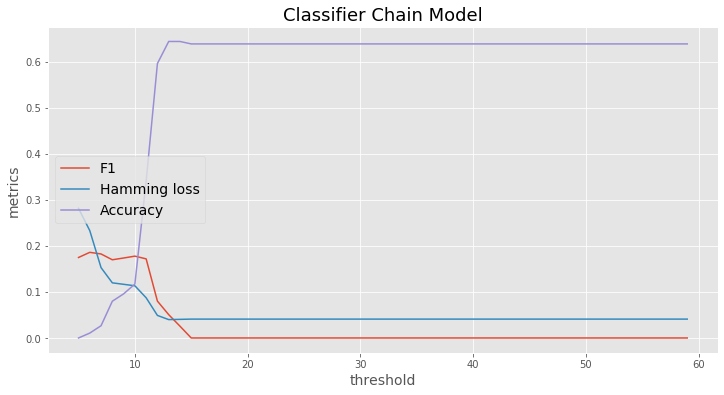

In [121]:
# Assess Performance of Model (Accuracy (mention class imbalance if there is), F1-Score, Hamming Loss) and Report Results to Imran
#for plotting metrics as a function of threshold
th = []
f = []
ham = []
ac = []
for t in range(5,60): # threshold value
    y_pred_new = (predictions >= t/100).astype(int)
    print("t =" ,t/100)
    print("Accuracy = ",accuracy_score(y_test,y_pred_new))
    print("F1 = ",f1_score(y_test,y_pred_new, average="micro")) #f1_score @ micro means to calculate metrics globally by counting the total true positives, false negatives and false positives
    print("Hamming loss = ",hamming_loss(y_test,y_pred_new))
    th.append(t)
    ac.append(accuracy_score(y_test,y_pred_new))
    f.append(f1_score(y_test,y_pred_new, average="micro"))
    ham.append(hamming_loss(y_test,y_pred_new))
plt.rcParams["figure.figsize"] = (12,6)
with plt.style.context('ggplot'):
    plt.plot(th, f)
    plt.plot(th, ham)
    plt.plot(th, ac)
    plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
    plt.ylabel("metrics", fontsize = 14)
    plt.xlabel("threshold", fontsize = 14)
    plt.title("Classifier Chain Model", fontsize = 18)
plt.show()

Most optimal threshold is when F1 is high, Hamming Loss is low and Accuracy increases. According to this graph, hard to tell. Though Accuracy increases and Hamming Loss descreases at around 12, F1 is approximately .12. This is not that great since want F1 score near 1. Next step would be to work on Feature Engineering and Model tuning/trying other models like OneVsRest or Binary Relevance.

Seeing that Classifier Chain is not a good representative, will try different models before trying different vectorizations of the text. Let's see what Binary Relevance and Label Powerset gets us. These are the results from above for Binary Relevance and Powerset:

Accuracy =  0.6382978723404256
F1 score =  0.0
Hamming loss =  0.040957446808510635

Though Accuracy is decent and Hamming loss is nice and low, F1 score is horrible. It should be near 1 for there to be good classification.

Next step is re-doing Feature Engineering. Instead of using TfidfVectorizer, will use bag of words, n-grams. Going to check out FB's FastText as well.